# Import thư viện 

In [31]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime

# Load file 

In [32]:
Product_Master = pd.read_excel("Product Master.xlsx",skiprows=1)
sales_order = pd.read_excel("sales order.xlsx") 
customer =pd.read_excel("customer master.xlsx")
Product_Master = pd.read_excel("Product Master.xlsx",skiprows=1) 
Packaging_Master = pd.read_excel("Packaging Master.xlsx",skiprows=2) 
bang1 = pd.read_excel('merg.xlsx') 

# Bảng dữ liệu chính 

In [33]:
def round_up(x):
    return math.ceil(x)

#### Bảng dữ liệu chính là bảng dữ liệu được ta lưu từ task 1 

In [34]:
bang1

,SOCreationDate,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit,pallet,Cluster
0,2021-08-02,14019842,3110685,57224.8944,58697.5260,991.68,1000,6,80.0,GBOT,29.594993,2
1,2021-08-02,14019842,3110678,77232.0384,79387.7568,991.68,1500,4,80.0,GBOT,40.026902,2
2,2021-08-02,14019842,3103449,13387.6800,13732.2000,991.68,1000,6,80.0,GBOT,6.923705,2
3,2021-08-02,14019842,3103450,2380.0320,2446.4640,991.68,1500,4,80.0,GBOT,1.233495,2
4,2021-08-02,11002626,3110656,7147.0080,7330.7520,992.64,1000,6,80.0,GBOT,3.692553,1
...,...,...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,11002626,3110687,11911.6800,12243.8400,992.64,1500,4,80.0,GBOT,6.167311,1
28676,2022-12-31,11002626,3110656,8338.1760,8552.5440,992.64,1000,6,80.0,GBOT,4.307979,1
28677,2022-12-31,11002626,3110678,32130.4320,33027.2640,991.68,1500,4,80.0,GBOT,16.652178,1
28678,2022-12-31,11002626,3110685,15470.2080,15868.3200,991.68,1000,6,80.0,GBOT,8.000726,1


tính kiểm tra tổng số pallet 

In [35]:
sum(bang1['pallet'])

109961.47478058758

# Chương trình tính số pallet tương đối tối ưu cho mỗi cụm 

In [36]:
def optimal_change(x):
    Sizes = [1100, 230, 70]  
    change = {size: 0 for size in Sizes}
    if x<70:
        change[70]=1
    for size in  Sizes:
        while x >= size:
            change[size] += 1
            x -= size
            if x<70 and x>0 :
                change[70] += 1  
    print(f'sizeSmall: {change[70]}')
    print(f'sizeMedium: {change[230]}')
    print(f'sizeBig: { change[1100]}')
    print(f'suc chua: { change[1100]*1100+change[230]*230+change[70]*70}')

# thêm cột chỉ Tuần vào bảng dữ liệu chính và lấy bảng dữ liệu năm 2022

Cột dữ liệu tuần cần được thêm vào bởi vì đề bài cho biết số hàng được thu gom theo tuần 

In [37]:
bang1.insert(1, 'WeekNumber', bang1['SOCreationDate'].dt.strftime('%W'))

In [38]:
bang1

,SOCreationDate,WeekNumber,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit,pallet,Cluster
0,2021-08-02,31,14019842,3110685,57224.8944,58697.5260,991.68,1000,6,80.0,GBOT,29.594993,2
1,2021-08-02,31,14019842,3110678,77232.0384,79387.7568,991.68,1500,4,80.0,GBOT,40.026902,2
2,2021-08-02,31,14019842,3103449,13387.6800,13732.2000,991.68,1000,6,80.0,GBOT,6.923705,2
3,2021-08-02,31,14019842,3103450,2380.0320,2446.4640,991.68,1500,4,80.0,GBOT,1.233495,2
4,2021-08-02,31,11002626,3110656,7147.0080,7330.7520,992.64,1000,6,80.0,GBOT,3.692553,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,52,11002626,3110687,11911.6800,12243.8400,992.64,1500,4,80.0,GBOT,6.167311,1
28676,2022-12-31,52,11002626,3110656,8338.1760,8552.5440,992.64,1000,6,80.0,GBOT,4.307979,1
28677,2022-12-31,52,11002626,3110678,32130.4320,33027.2640,991.68,1500,4,80.0,GBOT,16.652178,1
28678,2022-12-31,52,11002626,3110685,15470.2080,15868.3200,991.68,1000,6,80.0,GBOT,8.000726,1


In [39]:
bang1['WeekNumber']=bang1['WeekNumber'].astype('int')

In [40]:
bang1_2021=  bang1[bang1['SOCreationDate']<'2022-1-1']
bang1_2022= bang1[bang1['SOCreationDate']>='2022-1-1']

# Tính số pallet của mỗi điểm Collection trong mỗi tuần 

tính số pallet tổng của mỗi Cluster

In [41]:
total_1 = []
for j in range(0,4):
    total_pallet =bang1[(bang1['Cluster'] == j)]['pallet'].sum()
    total_1.append(total_pallet)

Tính số pallet mỗi tuần của mỗi tuần của mỗi Cluster

In [42]:
total_2 = {size:[] for size in range(0,4)}
for i in range(0,4):
    for j in range(1,53):
        total_pallet =bang1_2022[(bang1_2022['WeekNumber'] == j) & (bang1_2022['Cluster'] == i)]['pallet'].sum()
        total_2[i].append(round_up(total_pallet))

Lấy giá trị của tuần có số lượng pallet lớn nhất của mỗi Cluster

In [43]:
max_2022=[]
for i in range(4):
     max_2022.append(round_up(np.max(total_2[i])))
max_2022

[65, 417, 1397, 33]

In [44]:
mean_2022=[]
for i in range(4):
     mean_2022.append(round_up(np.mean(total_2[i])))
mean_2022

[40, 313, 1105, 21]

## tổng số 

In [45]:
for i in range(0, 4):   
    print(f"Cluster {i+1}")
    print(f"total_Pallet_Cluster {i+1} :{total_1[i] }")
    print(f"mean_total_Pallet_Cluster {i+1} :{mean_2022[i] }")
    optimal_change(mean_2022[i])
    print ("----------------------------------------------------") 

Cluster 1
total_Pallet_Cluster 1 :2830.058179144213
mean_total_Pallet_Cluster 1 :40
sizeSmall: 1
sizeMedium: 0
sizeBig: 0
suc chua: 70
----------------------------------------------------
Cluster 2
total_Pallet_Cluster 2 :23678.08102252165
mean_total_Pallet_Cluster 2 :313
sizeSmall: 2
sizeMedium: 1
sizeBig: 0
suc chua: 370
----------------------------------------------------
Cluster 3
total_Pallet_Cluster 3 :81984.41225294997
mean_total_Pallet_Cluster 3 :1105
sizeSmall: 1
sizeMedium: 0
sizeBig: 1
suc chua: 1170
----------------------------------------------------
Cluster 4
total_Pallet_Cluster 4 :1468.923325966279
mean_total_Pallet_Cluster 4 :21
sizeSmall: 1
sizeMedium: 0
sizeBig: 0
suc chua: 70
----------------------------------------------------


sau khi có kết quả tương đối cho mỗi điểm collection thì ta có thể hiệu chỉnh bằng tay các thông số để có thể đạt được mức tối ưu

In [46]:
chua=[70,350,1170,70]
max_2022

[65, 417, 1397, 33]

# Trực quan hóa về số lượng hàng mỗi tuần và sức chứa của mỗi điểm collection

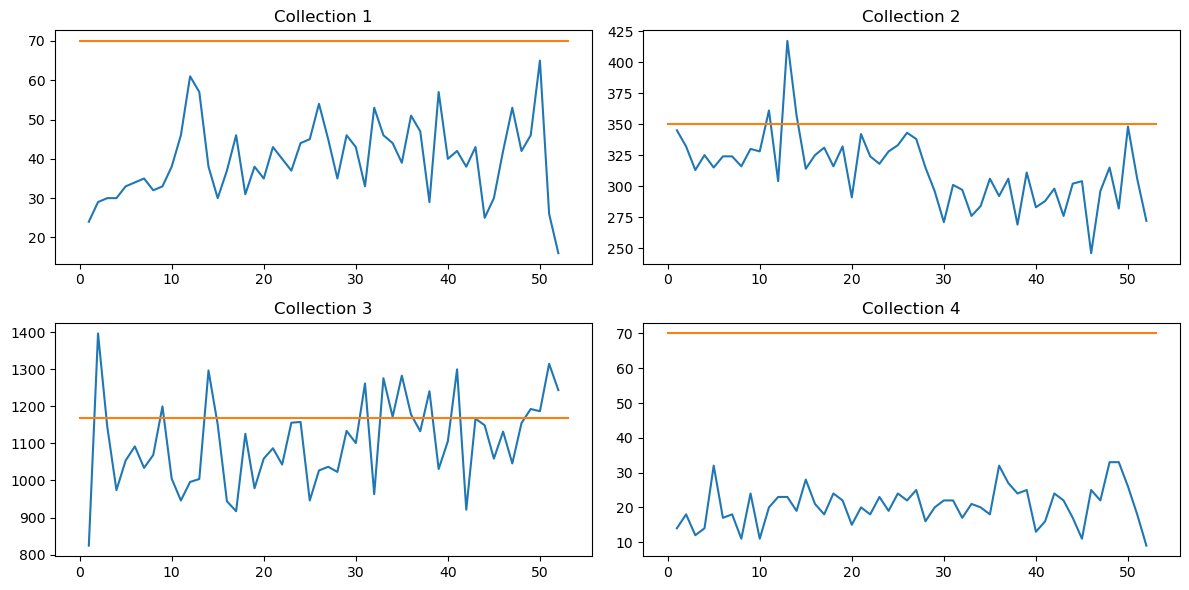

In [47]:
plt.figure(figsize=(12, 6))  # Tạo một hình vẽ có kích thước 12x6 inches

# Biểu đồ 1
plt.subplot(2, 2, 1)  # Dòng 1, cột 1
plt.plot(list(range(1,53)), total_2[0])
x = np.linspace(0, 53, 100)
y = chua[0]+0*x
plt.plot(x, y)
plt.title('Collection 1')

# Biểu đồ 2
plt.subplot(2, 2, 2)  # Dòng 1, cột 2
plt.plot(list(range(1,53)), total_2[1])
x = np.linspace(0, 53, 100)
y = chua[1]+0*x
plt.plot(x, y)
plt.title('Collection 2')

# Biểu đồ 3
plt.subplot(2, 2, 3)  # Dòng 2, cột 1
plt.plot(list(range(1,53)), total_2[2])
x = np.linspace(0, 53, 100)
y = chua[2]+0*x
plt.plot(x, y)
plt.title('Collection 3')

# Biểu đồ 4
plt.subplot(2, 2, 4)  # Dòng 2, cột 2
plt.plot(list(range(1,53)), total_2[3])
x = np.linspace(0, 53, 100)
y = chua[3]+0*x
plt.plot(x, y)
plt.title('Collection 4')

plt.tight_layout()  # Đảm bảo không bị trùng lấp
plt.show()  # Hiển thị biểu đồ


# Hàm để tính chi phí overflow

hàm số này overflow có tham số đầu vào là Cluster mà ta muốn tính

In [48]:
#tinh số ngày Overflow
import datetime
def sanluong1ngay( x, y):
    return bang1_2022[(bang1_2022['SOCreationDate'] == x) & (bang1_2022['Cluster'] == y)]['pallet'].sum()
def cost(x):
        tong=0
        ngay_7= datetime.timedelta(days=7)
        ngay_1= datetime.timedelta(days=1)
        ngay1 = datetime.datetime.strptime('2022-1-3', '%Y-%m-%d')
        cuoi=datetime.datetime.strptime('2022-12-31', '%Y-%m-%d')
        ngayss=ngay1
        while (ngayss<=cuoi):
            ngayss=ngayss+ngay_7
            du=0
            s=0
            while (s<=chua[x]):
                s = s+ sanluong1ngay(ngay1,x)
                if (ngay1==ngayss-ngay_1):
                    ngay1=ngay1 + ngay_1
                    break 
                ngay1=ngay1+ngay_1
            # số pallet du trong ngày mà số lượng pallet vượt số lượng có thể chứa
            if (s-chua[x])>0:
                tong=tong +(s-chua[x])*((ngayss-(ngay1-ngay_1)).days)
            # số pallet dư tương úng các ngày còn lại
            while (ngay1<ngayss):
                du=(ngayss-ngay1).days
                tong=tong+(sanluong1ngay(ngay1,x))*du
                ngay1=ngay1+ngay_1
        return (tong)
        

#### sử dụng hàm tính chi phí overflow và cộng với chi phí thuê của mỗi điểm Collection ta thu được tổng chi phí

tính chi phí overflow của tất cả các điểm

In [49]:
over=0
for i in range (4):
    over=over+cost(i)*3
over

10818.729291781496

tinh tổng chi phí  = chi phí thuê cố định + chi phí overflow


In [50]:
tong_chi_phi=0
tong_chi_phi = over+ sum(chua)*100 
tong_chi_phi

176818.7292917815

# tính số ngày trung bình của 1 pallet trong collection
số liệu này sử dụng để tính lượng CO2 phát thải tại mỗi điểm collection 

In [51]:
bang1_2022

,SOCreationDate,WeekNumber,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit,pallet,Cluster
8306,2022-01-01,0,11002626,3110656,9529.344,9774.336,992.64,1000,6,80.0,GBOT,4.923404,1
8307,2022-01-01,0,11002626,3110678,36890.496,37920.192,991.68,1500,4,80.0,GBOT,19.119167,1
8308,2022-01-01,0,11002626,3110685,19040.256,19530.240,991.68,1000,6,80.0,GBOT,9.847047,1
8309,2022-01-01,0,11002626,3110687,13102.848,13468.224,992.64,1500,4,80.0,GBOT,6.784043,1
8310,2022-01-01,0,11002626,3110656,8338.176,8552.544,992.64,1000,6,80.0,GBOT,4.307979,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,52,11002626,3110687,11911.680,12243.840,992.64,1500,4,80.0,GBOT,6.167311,1
28676,2022-12-31,52,11002626,3110656,8338.176,8552.544,992.64,1000,6,80.0,GBOT,4.307979,1
28677,2022-12-31,52,11002626,3110678,32130.432,33027.264,991.68,1500,4,80.0,GBOT,16.652178,1
28678,2022-12-31,52,11002626,3110685,15470.208,15868.320,991.68,1000,6,80.0,GBOT,8.000726,1


Nhóm số lượng pallet theo ngày

In [52]:
day_in_year=0
day_in_year=(bang1_2022.groupby('SOCreationDate').pallet.sum().reset_index())

In [53]:
day_in_year

,SOCreationDate,pallet
0,2022-01-01,78.267555
1,2022-01-03,37.593878
2,2022-01-04,332.246563
3,2022-01-05,208.744114
4,2022-01-06,230.278235
...,...,...
332,2022-12-27,161.872723
333,2022-12-28,327.965872
334,2022-12-29,191.521273
335,2022-12-30,641.502009


In [54]:
type(day_in_year['SOCreationDate'])

pandas.core.series.Series

Tính số ngày cần để đến ngày cuối tuần gần tiếp theo từ mỗi giá trị

In [77]:
from datetime import datetime, timedelta
date_objects = day_in_year['SOCreationDate'] = pd.to_datetime(day_in_year['SOCreationDate'])

# Tính số ngày cần để đến ngày cuối tuần gần tiếp theo từ mỗi giá trị
days_to_next_weekend = []
for date in date_objects:
    days_until_weekend = 0
    while date.weekday() != 6:  # 6 tương ứng với ngày thứ 7 (cuối tuần)
        date += timedelta(days=1)
        days_until_weekend += 1
    days_to_next_weekend.append(days_until_weekend)

daytoweekend = pd.DataFrame(days_to_next_weekend)
daytoweekend

,0
0,1
1,6
2,5
3,4
4,3
...,...
332,5
333,4
334,3
335,2


Thêm cột tính DaysToNextWeekend vào bảng data 

In [56]:
d1= pd.DataFrame({'DaysToNextWeekend': days_to_next_weekend})

In [57]:
day_in_year= pd.concat([day_in_year, d1], axis=1)

In [58]:
day_in_year

,SOCreationDate,pallet,DaysToNextWeekend
0,2022-01-01,78.267555,1
1,2022-01-03,37.593878,6
2,2022-01-04,332.246563,5
3,2022-01-05,208.744114,4
4,2022-01-06,230.278235,3
...,...,...,...
332,2022-12-27,161.872723,5
333,2022-12-28,327.965872,4
334,2022-12-29,191.521273,3
335,2022-12-30,641.502009,2


tính số ngày trung bình mỗi pallet sẽ ở điểm colection  

In [59]:
day_in_collection=((day_in_year['DaysToNextWeekend']*day_in_year['pallet']).sum())/ (day_in_year['pallet'].sum())

In [60]:
day_in_collection

3.6342923142883543

## Tính lượng phát thải khí CO2 tại các điểm CP

In [61]:
CO2=bang1_2022['pallet'].sum()*2.4*0.371*(day_in_collection/365)
print(f"CO2 tai Collection: {CO2}kg")

CO2 tai Collection: 681.0897508137231kg


# Đề xuất tỉ lệ infow 

In [62]:
import pandas as pd
bang1_2022.loc[:, 'hieu'] = bang1_2022['GrossWeightInKg'] - bang1_2022['NetWeightInKg']
bang1_2022

C:\Users\phamnhat\AppData\Local\Temp\ipykernel_15132\4193926630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang1_2022.loc[:, 'hieu'] = bang1_2022['GrossWeightInKg'] - bang1_2022['NetWeightInKg']


,SOCreationDate,WeekNumber,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit,pallet,Cluster,hieu
8306,2022-01-01,0,11002626,3110656,9529.344,9774.336,992.64,1000,6,80.0,GBOT,4.923404,1,244.992
8307,2022-01-01,0,11002626,3110678,36890.496,37920.192,991.68,1500,4,80.0,GBOT,19.119167,1,1029.696
8308,2022-01-01,0,11002626,3110685,19040.256,19530.240,991.68,1000,6,80.0,GBOT,9.847047,1,489.984
8309,2022-01-01,0,11002626,3110687,13102.848,13468.224,992.64,1500,4,80.0,GBOT,6.784043,1,365.376
8310,2022-01-01,0,11002626,3110656,8338.176,8552.544,992.64,1000,6,80.0,GBOT,4.307979,1,214.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,52,11002626,3110687,11911.680,12243.840,992.64,1500,4,80.0,GBOT,6.167311,1,332.160
28676,2022-12-31,52,11002626,3110656,8338.176,8552.544,992.64,1000,6,80.0,GBOT,4.307979,1,214.368
28677,2022-12-31,52,11002626,3110678,32130.432,33027.264,991.68,1500,4,80.0,GBOT,16.652178,1,896.832
28678,2022-12-31,52,11002626,3110685,15470.208,15868.320,991.68,1000,6,80.0,GBOT,8.000726,1,398.112


In [63]:
bang1_2022['packagings recycled']= bang1_2022['UnitperCarton']*bang1_2022['CartonsPerPallet']*bang1_2022['pallet']/2

C:\Users\phamnhat\AppData\Local\Temp\ipykernel_15132\4008544999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang1_2022['packagings recycled']= bang1_2022['UnitperCarton']*bang1_2022['CartonsPerPallet']*bang1_2022['pallet']/2


In [64]:
bang1_2022

,SOCreationDate,WeekNumber,CustomerRef,ProductID,NetWeightInKg,GrossWeightInKg,KgPerPallet,Weight,UnitperCarton,CartonsPerPallet,Unit,pallet,Cluster,hieu,packagings recycled
8306,2022-01-01,0,11002626,3110656,9529.344,9774.336,992.64,1000,6,80.0,GBOT,4.923404,1,244.992,1181.617021
8307,2022-01-01,0,11002626,3110678,36890.496,37920.192,991.68,1500,4,80.0,GBOT,19.119167,1,1029.696,3059.066796
8308,2022-01-01,0,11002626,3110685,19040.256,19530.240,991.68,1000,6,80.0,GBOT,9.847047,1,489.984,2363.291384
8309,2022-01-01,0,11002626,3110687,13102.848,13468.224,992.64,1500,4,80.0,GBOT,6.784043,1,365.376,1085.446809
8310,2022-01-01,0,11002626,3110656,8338.176,8552.544,992.64,1000,6,80.0,GBOT,4.307979,1,214.368,1033.914894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,2022-12-31,52,11002626,3110687,11911.680,12243.840,992.64,1500,4,80.0,GBOT,6.167311,1,332.160,986.769826
28676,2022-12-31,52,11002626,3110656,8338.176,8552.544,992.64,1000,6,80.0,GBOT,4.307979,1,214.368,1033.914894
28677,2022-12-31,52,11002626,3110678,32130.432,33027.264,991.68,1500,4,80.0,GBOT,16.652178,1,896.832,2664.348500
28678,2022-12-31,52,11002626,3110685,15470.208,15868.320,991.68,1000,6,80.0,GBOT,8.000726,1,398.112,1920.174250


## Tính khối lượng của từng loại để có số lượng tổng, khối lượng tái chế và khối lượng nguyên chất

In [65]:
CTN= bang1_2022[(bang1_2022['Unit'] == 'CTN')].hieu.sum()
PBOT=bang1_2022[(bang1_2022['Unit'] == 'PBOT')].hieu.sum()
GBOT= bang1_2022[(bang1_2022['Unit'] == 'GBOT')].hieu.sum()

In [69]:
print(f"CTN {CTN}kg")
print(f"PBOT {PBOT}kg")
print(f"GBOT {GBOT}kg")

CTN 515604.6479999996kg
PBOT 398809.5372kg
GBOT 3458379.0431999983kg


In [68]:
inflow=(0.7*PBOT+0.7*CTN+1*GBOT)/(PBOT+CTN+GBOT)
inflow

0.9372656695088292

# Lượng CO2 giảm được sau khi áp dụng kế hoạch

CO2save= CO2before - CO2after

In [70]:
tong_CO2=(CTN*0.1*0.57+PBOT*0.05*1.7)/(1000) + (GBOT*1.2+CTN*0.9*0.7+PBOT*0.95*3.1)/(1000) 
tong_CO2

5712.668142731997

In [71]:
tong_CO2_after=(CTN*0.7*0.57+PBOT*0.7*1.7+ GBOT*0.55)/(1000) + (CTN*0.3*0.7+PBOT*0.3*3.1)/(1000) +CO2
tong_CO2_after


3742.6776740697223

In [72]:
GHG_saved= tong_CO2-tong_CO2_after
GHG_saved

1969.990468662275

In [73]:
GHG_saved/tong_CO2

0.3448459492905458